In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:


# Get the path to the "documents" folder
documents_folder = os.path.expanduser('~/Documents')

# Specify the file name
file_name = 'Covid_Responses.csv'

# Construct the full file path
file_path = os.path.join(documents_folder, file_name)

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Now you can work with the data in the DataFrame


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                40 non-null     object 
 1   Country                 40 non-null     object 
 2   State                   28 non-null     object 
 3   Age                     40 non-null     int64  
 4   Gender                  37 non-null     object 
 5   Before-Environment      40 non-null     object 
 6   Before-ClassworkStress  40 non-null     int64  
 7   Before-HomeworkStress   40 non-null     int64  
 8   Before-HomeworkHours    40 non-null     float64
 9   Now-Environment         40 non-null     object 
 10  Now-ClassworkStress     40 non-null     int64  
 11  Now-HomeworkStress      40 non-null     int64  
 12  Now-HomeworkHours       40 non-null     float64
 13  FamilyRelationships     40 non-null     int64  
 14  FriendRelationships     40 non-null     int6

In [24]:
data.head()

,Category,Country,State,Age,Gender,Before-Environment,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-Environment,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
0,SchoolCollegeTraining,US,TX,14,Male,Physical,1,3,2.0,Virtual,3,5,4.5,2,-1
1,SchoolCollegeTraining,US,MD,13,Male,Physical,5,4,2.0,Virtual,3,5,2.5,1,-2
2,Homeschool,US,TX,16,Female,Virtual,1,3,10.0,Virtual,3,5,15.0,1,-1
3,SchoolCollegeTraining,US,GA,17,Male,Physical,4,4,6.0,Physical,5,1,6.0,0,-2
4,SchoolCollegeTraining,GB,NaN,14,Male,Physical,3,4,4.0,Physical,5,5,6.0,0,1


In [32]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by='count', ascending = False)
print(missing)

                        count     %
State                      12  30.0
Gender                      3   7.5
Category                    0   0.0
Country                     0   0.0
Age                         0   0.0
Before-Environment          0   0.0
Before-ClassworkStress      0   0.0
Before-HomeworkStress       0   0.0
Before-HomeworkHours        0   0.0
Now-Environment             0   0.0
Now-ClassworkStress         0   0.0
Now-HomeworkStress          0   0.0
Now-HomeworkHours           0   0.0
FamilyRelationships         0   0.0
FriendRelationships         0   0.0


In [39]:
data = data.dropna()
print(data)

                 Category Country State  Age  Gender Before-Environment  \
0   SchoolCollegeTraining      US    TX   14    Male           Physical   
1   SchoolCollegeTraining      US    MD   13    Male           Physical   
2              Homeschool      US    TX   16  Female            Virtual   
3   SchoolCollegeTraining      US    GA   17    Male           Physical   
5   SchoolCollegeTraining      US    WV   17    Male           Physical   
6   SchoolCollegeTraining      US    MO   18  Female           Physical   
7   SchoolCollegeTraining      US    PA   17    Male           Physical   
8              Homeschool      US    IL   16  Female             Hybrid   
9   SchoolCollegeTraining      US    MN   15  Female           Physical   
10             Homeschool      US    TX   18    Male             Hybrid   
11             Homeschool      US    FL   15  Female           Physical   
12             Homeschool      US    FL   14  Female            Virtual   
13  SchoolCollegeTraining

In [40]:
data.select_dtypes('object')


,Category,Country,State,Gender,Before-Environment,Now-Environment
0,SchoolCollegeTraining,US,TX,Male,Physical,Virtual
1,SchoolCollegeTraining,US,MD,Male,Physical,Virtual
2,Homeschool,US,TX,Female,Virtual,Virtual
3,SchoolCollegeTraining,US,GA,Male,Physical,Physical
5,SchoolCollegeTraining,US,WV,Male,Physical,Virtual
6,SchoolCollegeTraining,US,MO,Female,Physical,Virtual
7,SchoolCollegeTraining,US,PA,Male,Physical,Virtual
8,Homeschool,US,IL,Female,Hybrid,Hybrid
9,SchoolCollegeTraining,US,MN,Female,Physical,Virtual
10,Homeschool,US,TX,Male,Hybrid,Virtual


In [48]:
grouped_data = data.groupby('Age')

# Select only the numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Group the data by the 'Age' column
grouped_data = data.groupby('Age')

# Calculate the means of numerical columns for each age group
means = grouped_data[numerical_columns.columns].mean()

means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Age,,,,,,,,,
13,13.0,5.000000,4.00,2.000000,3.000000,5.000000,2.500000,1.000000,-2.000000
14,14.0,2.600000,3.40,3.400000,4.400000,5.000000,5.100000,0.200000,-0.600000
15,15.0,1.714286,2.00,2.000000,3.571429,3.857143,5.428571,0.428571,-0.428571
16,16.0,2.250000,3.25,4.500000,2.750000,4.250000,5.250000,0.000000,0.500000
17,17.0,2.333333,3.50,3.916667,3.666667,4.000000,5.416667,0.333333,-2.000000


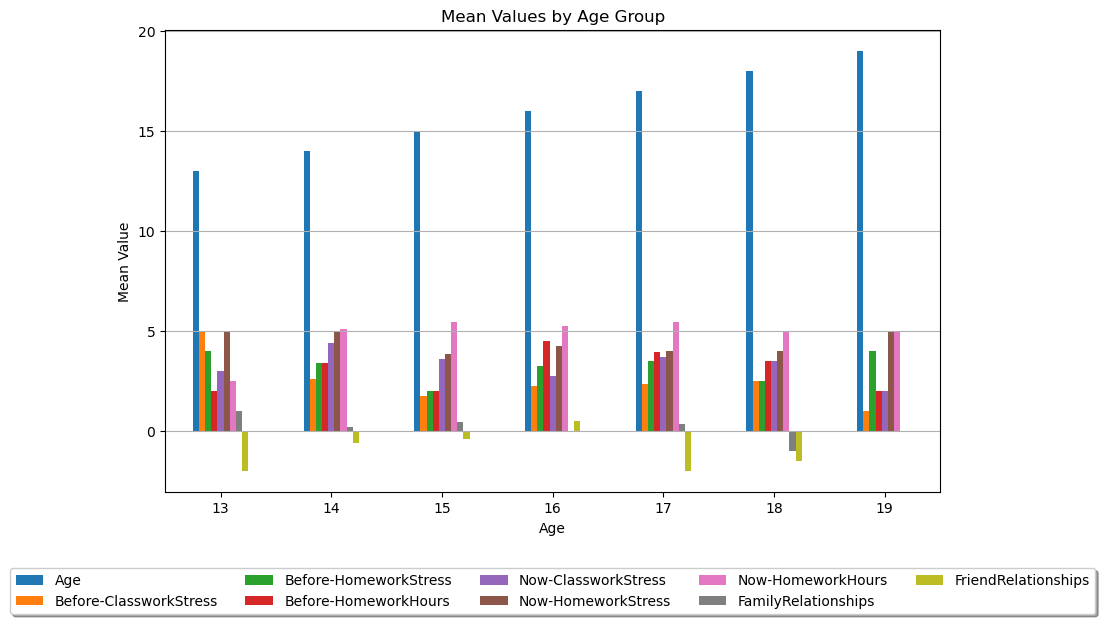

In [55]:
import matplotlib.pyplot as plt

# Plot the means
ax = means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Age Group')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


In [60]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Gender'
gender_groups = numerical_data.groupby(data['Gender'])

# Calculate means for each gender group
gender_means = gender_groups.mean()

# Display the means
gender_means

gender_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Gender,,,,,,,,,
Female,15.714286,2.071429,2.785714,3.678571,3.357143,4.285714,5.964286,0.0,-0.428571
Male,15.800000,2.700000,3.100000,2.700000,3.800000,4.100000,4.300000,0.5,-1.000000
Other,15.500000,1.500000,4.000000,2.500000,3.500000,5.000000,4.000000,0.0,-2.500000


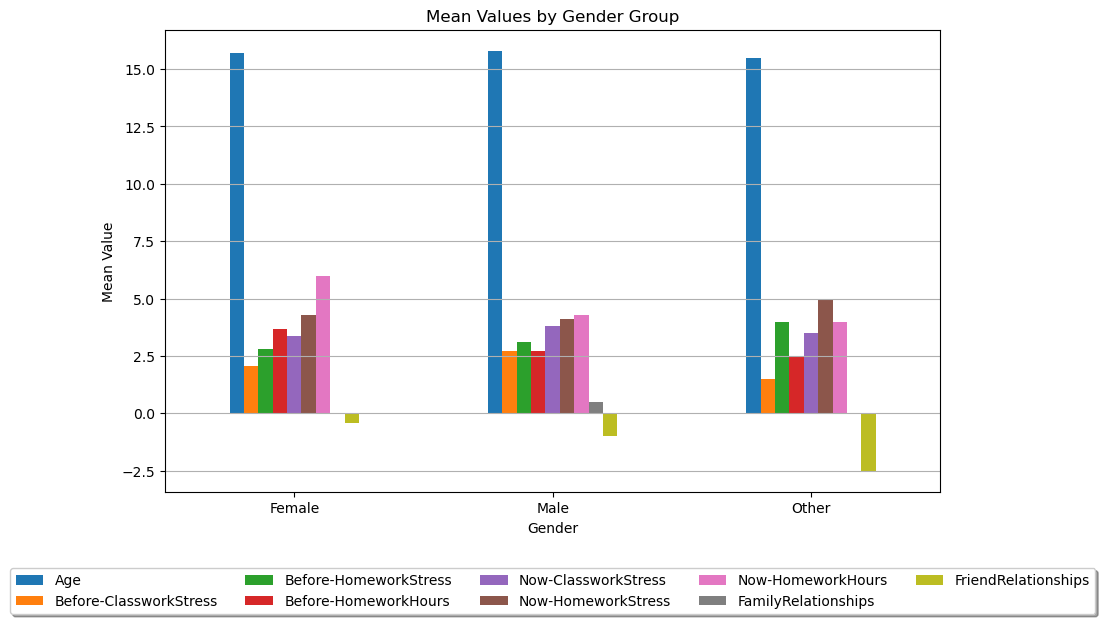

In [67]:
import matplotlib.pyplot as plt

# Plot the means
ax = gender_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Gender Group')
plt.xlabel('Gender')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


In [68]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Gender'
state_groups = numerical_data.groupby(data['State'])

# Calculate means for each gender group
state_means = state_groups.mean()

# Display the means
state_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
State,,,,,,,,,
AZ,19.00,1.00,4.00,2.0,2.00,5.0,5.00,0.0,0.0
CA,17.00,4.00,5.00,5.0,1.00,5.0,2.00,-1.0,-3.0
CO,14.00,5.00,4.00,9.0,6.00,5.0,10.00,-1.0,-3.0
FL,14.75,1.75,2.25,4.0,4.25,5.0,6.75,-0.5,0.5
GA,16.00,3.00,2.50,3.0,5.00,3.0,4.50,1.5,-2.5


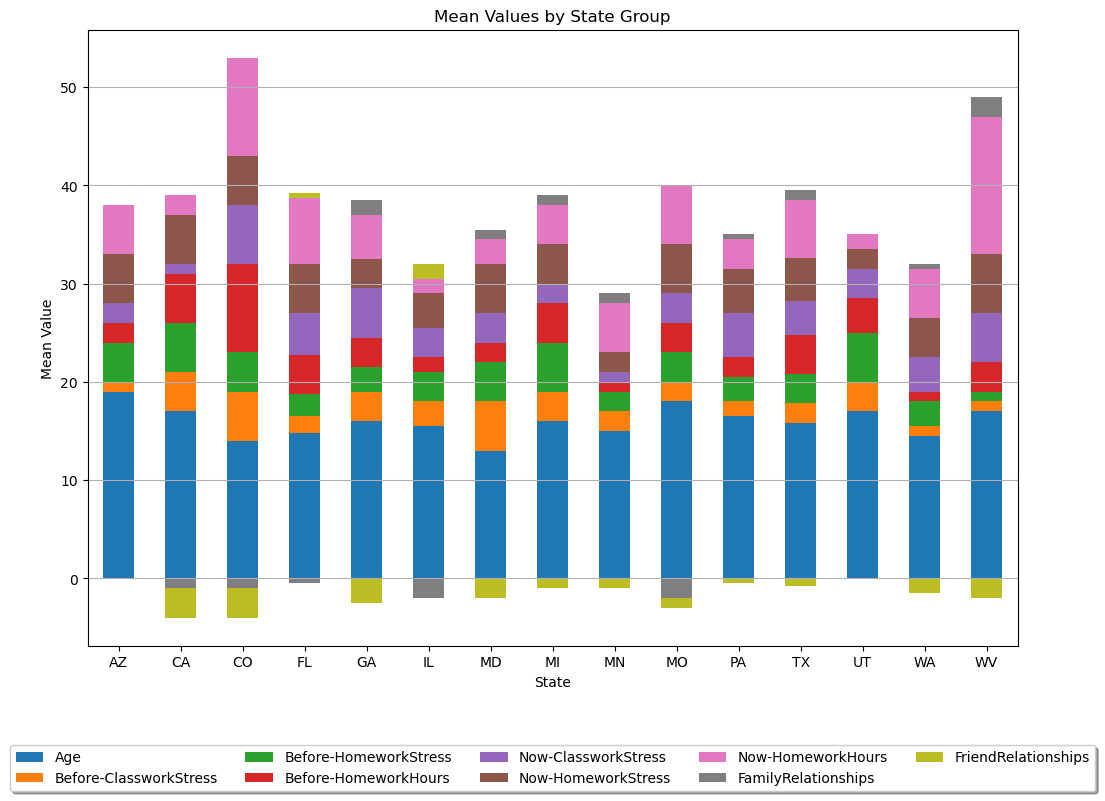

In [77]:
import matplotlib.pyplot as plt

# Plot the stacked bar graph
ax = state_means.plot(kind='bar', figsize=(12, 8), stacked=True)  # Adjust the figure size as needed
plt.title('Mean Values by State Group')
plt.xlabel('State')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


In [85]:
# Define a dictionary mapping states to regions
state_region_mapping = {
    'TX': 'South',
    'MD': 'Northeast',
    'GA': 'South',
    'WV': 'South',
    'MO': 'Midwest',
    'PA': 'Northeast',
    'IL': 'Midwest',
    'MN': 'Midwest',
    'FL': 'South',
    'CO': 'West',
    'WA': 'West',
    'UT': 'West',
    'MI': 'Midwest',
    'CA': 'West',
    'AZ': 'West'
}

# Add a new column 'Region' based on the mapping
data['Region'] = data['State'].map(state_region_mapping)

# Display the DataFrame with the 'Region' column
data.head()

,Category,Country,State,Age,Gender,Before-Environment,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-Environment,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships,Region
0,SchoolCollegeTraining,US,TX,14,Male,Physical,1,3,2.0,Virtual,3,5,4.5,2,-1,South
1,SchoolCollegeTraining,US,MD,13,Male,Physical,5,4,2.0,Virtual,3,5,2.5,1,-2,Northeast
2,Homeschool,US,TX,16,Female,Virtual,1,3,10.0,Virtual,3,5,15.0,1,-1,South
3,SchoolCollegeTraining,US,GA,17,Male,Physical,4,4,6.0,Physical,5,1,6.0,0,-2,South
5,SchoolCollegeTraining,US,WV,17,Male,Physical,1,1,3.0,Virtual,5,6,14.0,2,-2,South


In [87]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Group the numerical data by 'Gender'
region_groups = numerical_data.groupby(data['Region'])

# Calculate means for each gender group
region_means = region_groups.mean()

# Display the means
region_means.head()

,Age,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Region,,,,,,,,,
Midwest,16.000000,2.400000,3.200000,2.200000,2.400000,3.600000,3.600000,-0.800000,0.00
Northeast,15.333333,2.666667,3.000000,2.000000,4.000000,4.666667,2.833333,0.666667,-1.00
South,15.583333,2.000000,2.500000,3.750000,4.083333,4.500000,6.625000,0.666667,-0.75
West,16.000000,2.500000,3.833333,3.583333,3.166667,4.166667,4.750000,-0.166667,-1.50


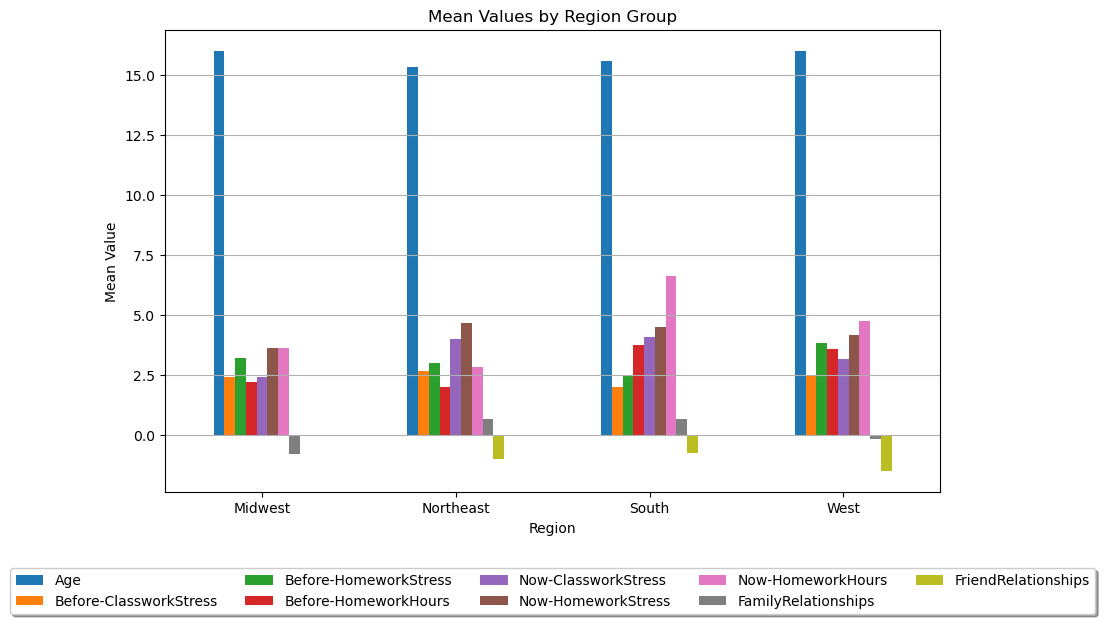

In [89]:
import matplotlib.pyplot as plt

# Plot the means
ax = region_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values by Region Group')
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()
